# **Introduction**

  * This project is based on credit card approval to customers by a particular bank. Such a study is very much important for all banks since they need to decide whether to approve or reject a credit card for a particular customer based on his/her provided details.
  * Information about customers like whether they are employed or not, their education level, annual income, property ownership, type of income and type of occupation is very much important for a bank employee to valuate their profile for approving credit card.
  * For this, we can use machine learning models to predict the result. Before training the data for any model, the following steps has to be done:
    * EDA - Exploratory data analysis
    * Data analysis through visualizations
    * Data cleaning
      * Encoding the categorical data
      * Imputing the missing values
      * Trimming the outliers
    * Data preprocessing
      * Checking for multicollinearity
      * Feature selection
      * Spitting data into training and test data
      * Standardizing the data



## Importing the dataset

In [ ]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Importing the 'Credit_card' table

credit_card = pd.read_csv('Credit_card.csv')

In [ ]:
# Importing the 'Credit_card_label' table

label = pd.read_csv('Credit_card_label.csv')

* All the independent features are in credit_card table and the target variable is in label table.
* Ind_ID is the common feature for both the tables.
* The tables needs to be merged for further analysis.

In [ ]:
# Merging the tables to a single dataframe

df = credit_card.merge(label, how = 'inner', on = 'Ind_ID')
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


# **Basic exploration**

In [ ]:
df.shape                   # checking for the shape of the dataframe

(1548, 19)

*  The dataset has **1548 records** and **19 fields**.

In [ ]:
df.dtypes                    # checking for the datatypes of all columns

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [ ]:
df.info()                  # info() gives the basic information of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

**Features in the dataset**

* Ind_ID: Client ID

* Gender: Gender information

* Car_owner: 'Y' means having car or 'N' means not having car

* Propert_owner: 'Y' means having property or 'N' means not having property

* Children: Count of children

* Annual_income: Annual income

* Type_Income: Income type

* Education: Education level

* Marital_status: Marital status

* Housing_type: Living style

* Birthday_count: Number of days from birthday (in backward count)

* Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

* Mobile_phone: Any mobile phone

* Work_phone: Any work phone

* Phone: Any phone number

* EMAIL_ID: Any email ID

* Type_Occupation: Occupation

* Family_Members: Family size

* Label: 0 is application approved and 1 is application rejected.



In [ ]:
df.nunique()                # nunique() gives the number of unique values in each column

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [ ]:
df['GENDER'].unique()         # unique() gives the unique values in the required column

array(['M', 'F', nan], dtype=object)

 *  This shows that there are null values in the GENDER column

In [ ]:
df['Car_Owner'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df['Propert_Owner'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df['CHILDREN'].unique()

array([ 0,  1,  2,  4,  3, 14])

In [ ]:
df['Type_Income'].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [ ]:
df['EDUCATION'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [ ]:
df['Marital_status'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [ ]:
df['Housing_type'].unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
df['Type_Occupation'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

*  There are null values in Type_Occupation column

In [ ]:
df['Family_Members'].unique()

array([ 2,  3,  1,  4,  6,  5, 15])

In [ ]:
df.drop_duplicates()             # drop_duplicates() removes the duplicate entries if any in the dataframe

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [ ]:
df.describe(include = 'all')        # describe() gives the overall description of the dataframe

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


# **EDA by Data Visualizations**

In [ ]:
# defining style and color palette of the plots

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [ ]:
fig = px.histogram(df, x = 'Annual_income', color = 'label', height = 500, width = 800, opacity = 0.75,
                   labels = {'Annual_income':'Annual Income'},
                   title = 'Distribution of Annual income')
fig.update_layout(title = dict(x = 0.5, y = 0.9, xanchor = 'center', yanchor = 'top',
                               font = dict(size = 18)))

fig.show()

**Observations:**

*  The above plot shows the distribution of Annual income of the customers.
*  Red coloured bins shows the annual income of customers with good credit and blue coloured bins shows annual income of customers with bad credit.
*  There is no such a linear relationship between annual income and the target variable but from this plot, if we move the mouse-pointer over the graph we can get information like count of customers having good/bad credit and range of their annual income.
*  Majority of the customers credit card has been rejected for customers with annual income in the range of 120k - 139.9k dollars.

In [ ]:
fig = px.box(df, x = 'GENDER', y = 'Annual_income', color = 'label', width = 500, height = 500, notched = True,
             labels = {'GENDER':'Gender', 'Annual_income':'Annual Income'},
             title = 'Distribution of Annual income based on gender')
fig.update_layout(title = dict(x = 0.5, y = 0.9, xanchor = 'center', yanchor = 'top',
                               font = dict(size = 16)))
fig.show()

**Observations:**

*  The above plot shows the distribution of annual income based on gender.
*  Here, we can see that for both male and female customers, the count of credit cards approved and rejected are almost equal.

In [ ]:
fig = px.box(df, x = 'Type_Occupation', y = 'Annual_income', color = 'label', height = 600, width = 1000,
             labels = {'Type_Occupation':'Type of occupation', 'Annual_income':'Annual Income'},
             title = 'Distribution of Annual income based on occupation type')
fig.update_layout(title = dict(x = 0.5, y = 0.9, xanchor = 'center', yanchor = 'top',
                               font = dict(size = 16)))
fig.show()

**Observations:**

*  This plot shows the credit information of the customers along with their type of occupation.
*  Blue colored plots represents the rejection of credit cards.
*  Customers in occupation like **Private service**, **HR**, **Secretaries** and **Realty agents** have no bad credits.
*  Customers like **Low-skill Labourers**, **IT staff**, **waiters** and **Medicine staff** have less number of bad credits.
*  **Core staff**, **Sales staff** and **Managers** have the maximum number of bad credits.

In [ ]:
fig = px.sunburst(df, names = 'Type_Income', path = ['label', 'Type_Income'], height = 500, width = 500,
                  title = 'Type of income Vs Credit information')
fig.update_traces(textinfo = ' label + value + percent root')
fig.update_layout(title = dict(x = 0.5, y = 0.9, xanchor = 'center', yanchor = 'top',
                               font = dict(size = 16)))
fig.show()

**Observations:**

*  This plot shows the percentage of customers with good and bad credits along with their type of income.
*  Among 1373 customers with good credits,
   *  721 customers are working
   *  315 customers are Commercial associates
   *  227 customers are Pensioner
   *  110 customers are State servants.
*  Out of 175 customers having bad credits,
   *  77 customers are working
   *  50 customers are Commercial associates
   *  42 customers are Pensioner
   *  6 customers are State servants.
*  From these information, we can say that working customers have the most and customers who are State servants have the least bad credits.

In [ ]:
# calcuating age of customers from given column 'Birthday_count'

age = (np.ceil(df['Birthday_count']/365))*-1

# inserting 'Age' column in the dataset at column index 11

df.insert(loc = 11, column = 'Age', value = age)

In [ ]:
# deleting 'Birthday_count' column from the dataset

df = df.drop(['Birthday_count'], axis = 1)

In [ ]:
# reversing the sign of values in Employed_days column
# a positive value means number of days employed and a negative value means the customer is unemployed

df['Employed_days'] = df['Employed_days']*-1

# splitting the dataset into employed and unemployed

employed = df[df['Employed_days']>0]
unemployed = df[df['Employed_days']<0]

In [ ]:
fig = px.histogram(employed, x = 'Employed_days',color = 'label', height = 500, width = 500, opacity = 0.75,
             labels = {'Employed_days':'No.of days worked'},
             title = 'No.of employed days Vs Credit')
fig.update_layout(title = dict(x = 0.5, y = 0.9, xanchor = 'center', yanchor = 'top',
                               font = dict(size = 16)))
fig.show()

**Observations:**

*  This plot shows the distribution of number of employed days of customers.
*  There is some sort of relationship between employed days and the target variable.
*  The number of customers having bad credit is the maximum for customers who worked in the range of 500 to 999 days which is the second minimum range.
*  And, number of customers having bad credit is minimum for customers who worked above 4500 days.
*  From these inferences, we can say that as the experience of the customer increases, the chances of getting bad credits decreases.

In [ ]:
value = unemployed.groupby(unemployed['label']).count()
value['Employed_days']

label
0    226
1     35
Name: Employed_days, dtype: int64

*  Unemployed customers also have both good and bad credits.
*  Out of the enemployed, 226 customers have good credit and 35 customers have bad credit.

In [ ]:
fig = px.scatter(employed, x = 'Employed_days', y = 'Annual_income', color = 'GENDER', facet_col = 'label',
                 height = 500, width = 1000, labels = {'Employed_days': 'Employed days', 'Annual_income':'Annual income'},
                 title = 'Annual Income Vs Employed days')
fig.update_traces(marker = dict(opacity = 0.8, symbol = 'star-diamond'))
fig.update_layout(title = dict(x = 0.5, y = 0.9, xanchor = 'center', yanchor = 'top',
                               font = dict(size = 16)))
fig.show()

**Observations:**

* This plot shows the number of employed days of customers and their annual income.
* Annual income and employed days have no linear relationship.

In [ ]:
fig = px.scatter(df, x = 'Age', y = 'Annual_income', facet_col = 'label',
                 color = 'GENDER',height = 500, width = 1000,
                 labels = {'Age':'Age', 'Annual_income':'Annual Income'},
                 title = 'Age Vs Annual Income')
fig.update_traces(marker = dict(opacity = 0.8, symbol = 'star-diamond'))
fig.update_layout(title = dict(x = 0.5, y = 0.9, xanchor = 'center', yanchor = 'top',
                               font = dict(size = 16)))
fig.show()

**Observations:**

*  This plot shows annual income of customers based on their age.
*  From this plot, we can say that majority of customers have bad credit in the age group of 40 to 60 years.

# **Data cleaning**

## Dealing with Categorical data

*  All the categorical data in the dataframe needs to be encoded before training for any machine learning model.
*  There are various encoding techniques available like
     *  Label encoding
     *  Ordinal encoding
     *  One-hot encoding
     *  Dummy encoding
*  Here, I am using map function to encode the categorical data.

In [ ]:
df['GENDER'] = df['GENDER'].map({'M':0, 'F':1})

df['Car_Owner'] = df['Car_Owner'].map({'Y':1, 'N':0})

df['Propert_Owner'] = df['Propert_Owner'].map({'Y':1, 'N':0})

df['Type_Income'] = df['Type_Income'].map({'Pensioner':0, 'Commercial associate':1, 'Working':2, 'State servant':3})

df['EDUCATION'] = df['EDUCATION'].map({'Lower secondary':0, 'Secondary / secondary special':1,
                                       'Incomplete higher':2, 'Academic degree':3, 'Higher education':4})

df['Marital_status'] = df['Marital_status'].map({'Single / not married':0, 'Married':1, 'Civil marriage':2,
                                                 'Separated':3, 'Widow':4})

df['Housing_type'] = df['Housing_type'].map({'House / apartment':0, 'With parents':1, 'Rented apartment':2,
                                             'Municipal apartment':3, 'Co-op apartment':4, 'Office apartment':5})

df['Type_Occupation'] = df['Type_Occupation'].map({'Core staff':0,'Cooking staff':1, 'Laborers':2, 'Sales staff':3,
       'Accountants':4, 'Managers':5, 'Cleaning staff':6, 'Drivers':7,
       'Low-skill Laborers':8, 'High skill tech staff':9, 'IT staff':10,
       'Waiters/barmen staff':11, 'Security staff':12, 'Medicine staff':13,
       'Private service staff':14, 'HR staff':15, 'Secretaries':16,
       'Realty agents':17})

In [ ]:
df.head()

*  We can see that after encoding, all the categorical data have been converted to numerical data.

## Dealing with missing values

*  One of the important steps in Data cleaning is to deal with the missing values or null values.

In [ ]:
df.isnull().sum()           # isnull().sum() gives the count of null values in each column

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                 22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

*  We can see that there are
    *  7 null values in GENDER
    *  23 null values in Annual_income
    *  22 null values in Birthday_count
    *  488 null values in Type_Occupation

In [ ]:
import missingno as msno

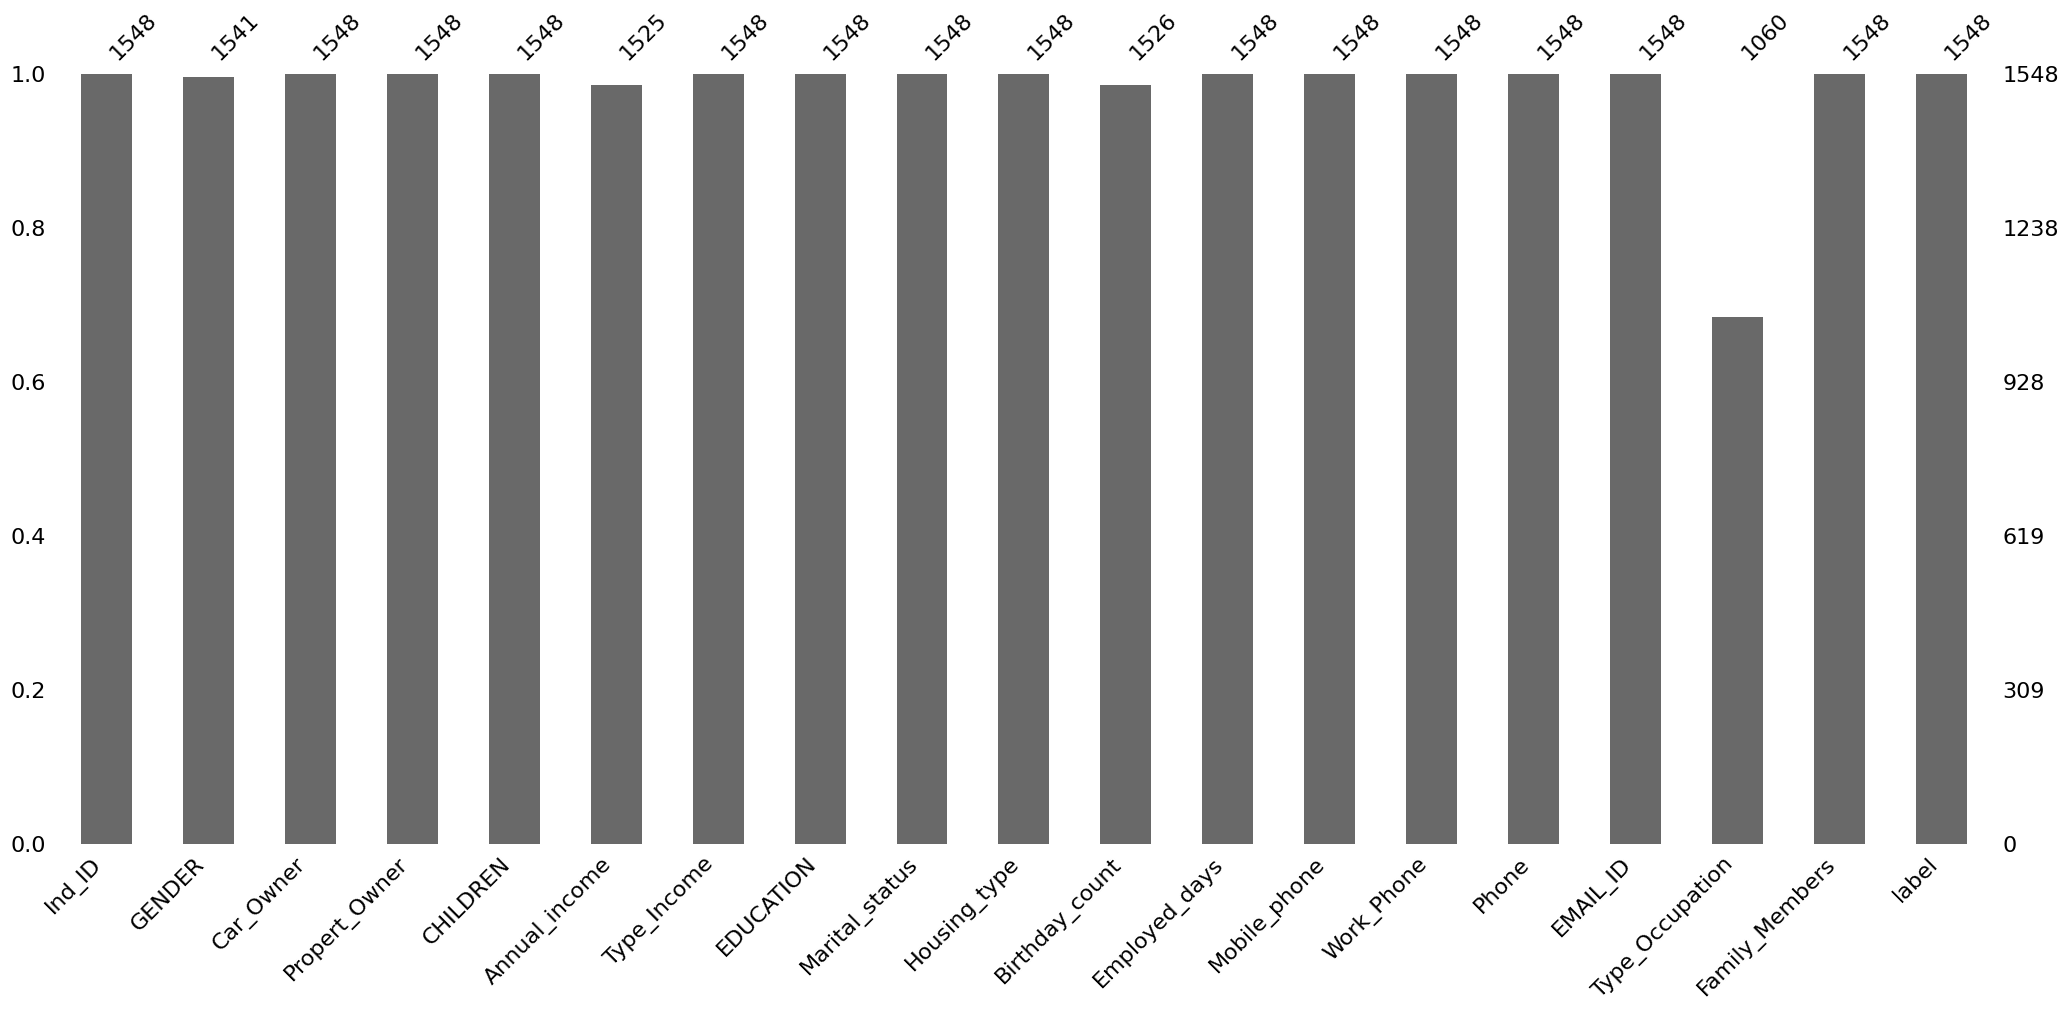

In [ ]:
# checking for the missing values through a bar plot

plt.figure(figsize = (5,5))
msno.bar(df)
plt.show()

<Axes: >

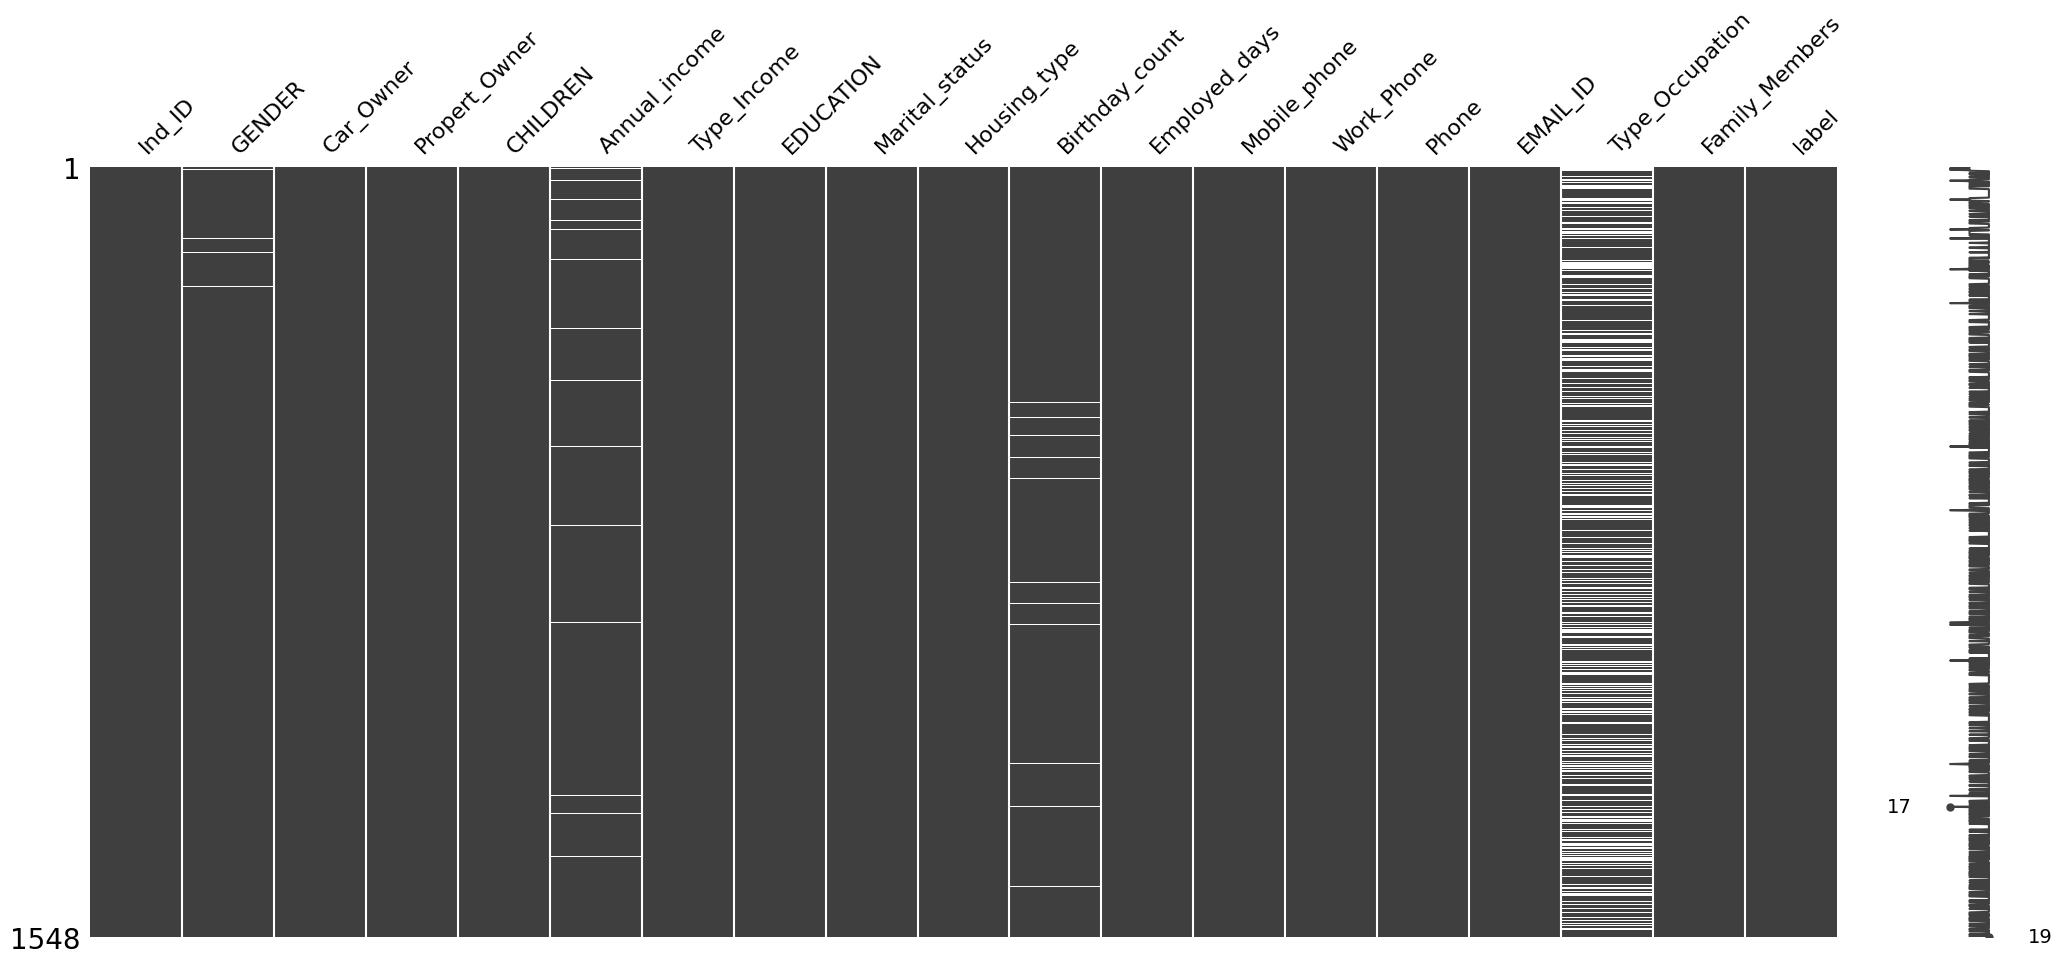

In [ ]:
# checking whether there is any pattern for the missing values

msno.matrix(df)

*  Since there is no particular pattern for the missing values, we can conclude that the values are missing completely at random **(MCAR)**.

In [ ]:
df.drop(df[df['GENDER'].isnull()].index, axis = 0, inplace = True)

*  In the GENDER column, since there are only 7 null values out of 1548 records, it can either be imputed or the records with null values can be deleted as it doesn't affect the overall data.
*  Therfore, I am deleting the records with null values in GENDER column.

* There are 2 categories of imputation techniques.
   *  Simple Imputation:
   
         These are the basic imputation techniques where the missing values can be replaced by any one of the following values:
           * Mean
           * Median
           * Mode
   * Advanced Imputation:

        The advanced imputation techniques includes
           * KNN imputation
           * MICE imputation

In [ ]:
# using the Mean imputation technique to impute the null values in Annual_income

from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy = 'mean')

df['Annual_income'] = mean_imputer.fit_transform(df['Annual_income'].values.reshape(-1,1))

In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.7 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=63c19baec74074e0b8940d5127657f3a66b2c821925fd8a3f56cd0313ff598fb
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=ab829a274a24127e00f029b61b829bee73dba10fef1ae5c7be1b51374ed321c1
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
# using KNN imputation to impute the null values in Type_Occupation and Age columns

from fancyimpute import KNN

knn_imputer = KNN()

#df['Type_Occupation'] = knn_imputer.fit_transform(df['Type_Occupation'].values.reshape(-1,1))
df['Age'] = knn_imputer.fit_transform(df['Age'].values.reshape(-1,1))

Imputing row 1/1541 with 0 missing, elapsed time: 0.368
Imputing row 101/1541 with 0 missing, elapsed time: 0.368
Imputing row 201/1541 with 0 missing, elapsed time: 0.377
Imputing row 301/1541 with 0 missing, elapsed time: 0.379
Imputing row 401/1541 with 0 missing, elapsed time: 0.386
Imputing row 501/1541 with 0 missing, elapsed time: 0.387
Imputing row 601/1541 with 0 missing, elapsed time: 0.388
Imputing row 701/1541 with 0 missing, elapsed time: 0.389
Imputing row 801/1541 with 0 missing, elapsed time: 0.390
Imputing row 901/1541 with 0 missing, elapsed time: 0.391
Imputing row 1001/1541 with 0 missing, elapsed time: 0.393
Imputing row 1101/1541 with 0 missing, elapsed time: 0.394
Imputing row 1201/1541 with 0 missing, elapsed time: 0.395
Imputing row 1301/1541 with 0 missing, elapsed time: 0.396
Imputing row 1401/1541 with 0 missing, elapsed time: 0.397
Imputing row 1501/1541 with 0 missing, elapsed time: 0.398
[KNN] Warning: 22/1541 still missing after imputation, replacing wit

In [ ]:
df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Age                0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

*  After all the imputation we can see that there are no null values in tha dataframe.

## Retrieving the cleaned data

*  Before retrieving the cleaned data, the encoded categorical data needs to be decoded to original data. Hence I am using the map function the decode the data.

In [ ]:
cleaned_df = df.copy()

cleaned_df['GENDER'] = cleaned_df['GENDER'].map({0:'M', 1:'F'})

cleaned_df['Car_Owner'] = cleaned_df['Car_Owner'].map({1:'Y', 0:'N'})

cleaned_df['Propert_Owner'] = cleaned_df['Propert_Owner'].map({1:'Y', 0:'N'})

cleaned_df['Type_Income'] = cleaned_df['Type_Income'].map({0:'Pensioner', 1:'Commercial associate', 2:'Working', 3:'State servant'})

cleaned_df['EDUCATION'] = cleaned_df['EDUCATION'].map({0:'Lower secondary', 1:'Secondary / secondary special',
                                       2:'Incomplete higher', 3:'Academic degree', 4:'Higher education'})

cleaned_df['Marital_status'] = cleaned_df['Marital_status'].map({0:'Single / not married', 1:'Married', 2:'Civil marriage',
                                                 3:'Separated', 4:'Widow'})

cleaned_df['Housing_type'] = cleaned_df['Housing_type'].map({0:'House / apartment', 1:'With parents', 2:'Rented apartment',
                                             3:'Municipal apartment', 4:'Co-op apartment', 5:'Office apartment'})

cleaned_df['Type_Occupation'] = cleaned_df['Type_Occupation'].map({0:'Core staff',1:'Cooking staff', 2:'Laborers', 3:'Sales staff',
       4:'Accountants', 5:'Managers', 6:'Cleaning staff', 7:'Drivers',
       8:'Low-skill Laborers', 9:'High skill tech staff', 10:'IT staff',
       11:'Waiters/barmen staff', 12:'Security staff', 13:'Medicine staff',
       14:'Private service staff', 15:'HR staff', 16:'Secretaries',
       17:'Realty agents'})

*  Here, I am getting the cleaned dataset to perform the SQL part of the project.

## Dealing with outliers

*  Outliers are the values in dataset which are present away from the trend of other existing values.
*  The presence of outliers leads to biasing the database.
*  Therefore, it is important to check whether there are any outliers in the dataset before training the dataset for ML models.
* Annual_income is the cotinuous data present in the dataset which needs to be checked for outliers.

In [ ]:
fig = px.box(df, y = 'Annual_income', width = 500, height = 500,
             title = 'Distribution of Annual Income')
fig.show()

*  The box plot shows the distribution of Annual_income.
*  The plot shows that there is a wide range of distribution where all the values lies below 1 Million only one value which is round 1.6 Millions. It is proved that the dataset contains outliers.

In [ ]:
# identifying the outliers by IQR method

Q1 = np.percentile(df['Annual_income'], 25)
Q2 = np.percentile(df['Annual_income'], 50)
Q3 = np.percentile(df['Annual_income'], 75)

IQR = Q3 - Q1

print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print('low_limit is', low_lim)
print('up_limit is', up_lim)

outlier =[]

for x in df['Annual_income']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('Outliers in the dataset is', outlier)
print('Number of outlier values is', len(outlier))

Interquartile range is 103500.0
low_limit is -33750.0
up_limit is 380250.0
Outliers in the dataset is [450000.0, 450000.0, 450000.0, 472500.0, 540000.0, 540000.0, 450000.0, 391500.0, 391500.0, 391500.0, 675000.0, 585000.0, 585000.0, 450000.0, 450000.0, 450000.0, 450000.0, 445500.0, 1575000.0, 1575000.0, 900000.0, 450000.0, 450000.0, 423000.0, 450000.0, 540000.0, 450000.0, 495000.0, 612000.0, 427500.0, 612000.0, 450000.0, 787500.0, 450000.0, 594000.0, 585000.0, 495000.0, 387000.0, 450000.0, 900000.0, 382500.0, 450000.0, 900000.0, 405000.0, 405000.0, 445500.0, 450000.0, 450000.0, 450000.0, 450000.0, 405000.0, 900000.0, 630000.0, 450000.0, 418500.0, 450000.0, 405000.0, 405000.0, 405000.0, 495000.0, 450000.0, 387000.0, 810000.0, 391500.0, 405000.0, 450000.0, 405000.0, 450000.0, 450000.0, 405000.0, 450000.0]
Number of outlier values is 71


* There are 71 outlier values in the dataset.

In [ ]:
# trimming the outliers using clip() function

df['Annual_income'] = df['Annual_income'].clip(lower = low_lim, upper = up_lim)

*  The clip() function replaces any values higher than upper limit by up_lim and values lesser than lower limit by low_lim.

In [ ]:
fig = px.box(df, y = 'Annual_income', width = 500, height = 500,
             title = 'Distribution of Annual Income')
fig.show()

*  Now we can see that the values are trimmed and replaced by upper and lower limit values.

# **Data preprocessing**

## Checking for multicollinearity of variables

*  One of the important things to keep in mind before training the model is checking for the multicollinearity of variables i.e., there should not be any linear relationship between the independent features as it may lead to decline in the accuracy of the model.
*  Firstly, I am deleting the columns which are inappropriate for the study.
*  Features like whether the customer has mobile phone or not, e-mail id or not and the id number of the customer doesn't play any role in credit card approval.
*  Therefore, I am deleting the **Ind_ID**, **Mobile_phone**, **Work_Phone**, **Phone** and **EMAIL_ID** columns from the dataset.

In [ ]:
df = df.drop(['Ind_ID','Mobile_phone','Work_Phone','Phone','EMAIL_ID'], axis = 1)

In [ ]:
# checking for multicollinearity of features by variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df.iloc[:,:-1]

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns

vif_data['VIF'] = [variance_inflation_factor(X_vif.values,i)
                    for i in range(len(X_vif.columns))]

print(vif_data)

            Feature        VIF
0            GENDER   3.217584
1         Car_Owner   2.032115
2     Propert_Owner   2.986173
3          CHILDREN   5.374970
4     Annual_income   6.486406
5       Type_Income   8.213564
6         EDUCATION   3.138728
7    Marital_status   2.867693
8      Housing_type   1.117764
9               Age  16.094747
10    Employed_days   3.767293
11  Type_Occupation   1.845756
12   Family_Members  22.250306


*  The optimal VIF value is lesser than or equal to 5.
*  **Age** and **Family_members** columns has high VIF values.

In [ ]:
# cheking for multicollinearity by dropping the features with high vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df.drop(['Age','Family_Members','label'], axis = 1)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns

vif_data['VIF'] = [variance_inflation_factor(X_vif.values,i)
                    for i in range(len(X_vif.columns))]

print(vif_data)

            Feature       VIF
0            GENDER  2.953417
1         Car_Owner  1.952373
2     Propert_Owner  2.838438
3          CHILDREN  1.343276
4     Annual_income  5.581053
5       Type_Income  5.727591
6         EDUCATION  3.092195
7    Marital_status  2.695591
8      Housing_type  1.114480
9     Employed_days  2.248570
10  Type_Occupation  1.794171


*  Now, all the features have optimal vif.
*  Hence, deleting the Age and Family_Members column from the dataset.

In [ ]:
df = df.drop(['Age','Family_Members'], axis = 1)

## Feature Selection

*  Feature selection is an important step where we can select the features which are best fit for the study.

In [ ]:
# splitting the dataset into dependent and independent features

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# using Logit model to check for feature selection

import statsmodels.api as sm

logit_model = sm.Logit(y,X)
result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.333456
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: label            Pseudo R-squared: 0.040     
Date:               2023-11-10 07:06 AIC:              1041.7129 
No. Observations:   1541             BIC:              1079.0942 
Df Model:           6                Log-Likelihood:   -513.86   
Df Residuals:       1534             LL-Null:          -535.00   
Converged:          1.0000           LLR p-value:      1.6081e-07
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
GENDER            -0.5247   0.1709 -3.0703 0.0021 -0.8597 -0.1897
Car_Owner         -0.2909   0.1838 -1.5832 0.1134 -0.6511  0.0692


* The optimal value of |z| is lesser than or equal to 0.5 .
* Features like **Type_Occupation**, **EDUCATION**, **CHILDREN** and **Propert_Owner** has high |z| value.
* Hence, I am deleting those features from the dataset.

In [ ]:
df = df.drop(['Type_Occupation','EDUCATION','CHILDREN','Propert_Owner'],axis = 1)

## Splitting the dataset into training and test data

In [ ]:
# splitting the dataset into independent and dependent features
# 20% of the data to test data and 80% to trainig data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
# checking the dimensions of training dataset

print(X_train.shape)
print(y_train.shape)

(1232, 7)
(1232,)


* Training dataset has **1232** records

In [ ]:
# checking the dimensions of test data

print(X_test.shape)
print(y_test.shape)

(309, 7)
(309,)


* Test data has **309** records

## Standardizing the data

* Data in the dataset may be on different scale.
* And hence it is necessary to standardize the data before training any model.
* Data can be standardized either using
  * Standard scaler
  * Min_max scaler
* Here, I am using Standard scaler to standardize the data.

In [ ]:
# importing StandardScaler library and standardizing the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# **Machine Learning Models**

## Logistic Regression

In [ ]:
# importing the LogisticRegression model

from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()

logistic_reg.fit(X_train, y_train)

# predicting the training data
log_pred_train = logistic_reg.predict(X_train)

In [ ]:
# predicting the test data
log_pred_test = logistic_reg.predict(X_test)

In [ ]:
# importing the classification metrics

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

In [ ]:
# evaluating the classification metrics
print('Classification metrics of training data:')

# Confusion matrix
c_matrix_log = confusion_matrix(y_train, log_pred_train)
print('Confusion matrix :')
print(c_matrix_log)

# Accuracy
acc_log_train = round(accuracy_score(y_train, log_pred_train),4)
print('Accuracy : ',acc_log_train)

# Precision
prec_log_train = round(precision_score(y_train, log_pred_train, average = 'weighted', zero_division = 1.0),4)
print('Precision : ',prec_log_train)

# Recall score
recall_log_train = round(recall_score(y_train, log_pred_train, average = 'weighted', zero_division = 1.0),4)
print('Recall : ',recall_log_train)

# F1 score
f1_log_train = round(f1_score(y_train, log_pred_train, average = 'weighted', zero_division = 1.0),4)
print('F1 Score : ',f1_log_train)

Classification metrics of training data:
Confusion matrix :
[[1093    1]
 [ 138    0]]
Accuracy :  0.8872
Precision :  0.7884
Recall :  0.8872
F1 Score :  0.8349


In [ ]:
print('Classification metrics of test data:')

# Accuracy
acc_log_test = round(accuracy_score(y_test, log_pred_test),4)
print('Accuracy : ',acc_log_test)

# Precision
prec_log_test = round(precision_score(y_test, log_pred_test, average = 'weighted', zero_division = 1.0),4)
print('Precision : ',prec_log_test)

# Recall score
recall_log_test = round(recall_score(y_test, log_pred_test, average = 'weighted', zero_division = 1.0),4)
print('Recall : ',recall_log_test)

# F1 score
f1_log_test = round(f1_score(y_test, log_pred_test, average = 'weighted', zero_division = 1.0),4)
print('F1 Score : ',f1_log_test)

Classification metrics of test data:
Accuracy :  0.8964
Precision :  0.9072
Recall :  0.8964
F1 Score :  0.8475


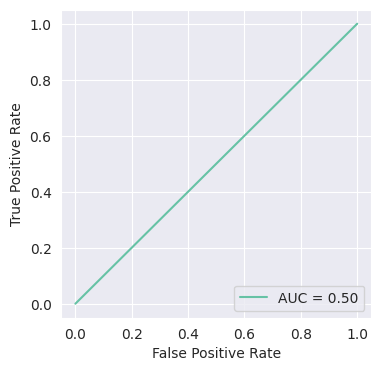

In [ ]:
# ROC_AUC curve
roc_auc_log = roc_auc_score(y_test, log_pred_test)

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, log_pred_test)

display = RocCurveDisplay(fpr = false_positive_rate, tpr = true_positive_rate, roc_auc = roc_auc_log).plot()
display.figure_.set_size_inches(4,4)

## Decision Tree Classifier

In [ ]:
# importing DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [ ]:
# using GridSearch algorithm to find the best fit parameters for the model

from sklearn.model_selection import GridSearchCV

parameter_grid = {'criterion':['gini','entropy','log_loss'],
                  'max_depth' : [2,3,4,5,6,7,8]}

grid = GridSearchCV(dtc, parameter_grid, refit = True)

grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8]})

In [ ]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 2}


In [ ]:
# training the model with best fit parameters

dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)

dtc.fit(X_train, y_train)

# predicting the train data
dtc_train_pred = dtc.predict(X_train)

In [ ]:
# predicting the test data
dtc_test_pred = dtc.predict(X_test)

In [ ]:
# evaluating the classification metrics
print('Classification metrics of training data:')

# Confusion matrix
c_matrix_dtc = confusion_matrix(y_train, dtc_train_pred)
print('Confusion matrix :')
print(c_matrix_dtc)

# Accuracy
acc_dtc_train = round(accuracy_score(y_train, dtc_train_pred),4)
print('Accuracy : ',acc_dtc_train)

# Precision
prec_dtc_train = round(precision_score(y_train, dtc_train_pred, average = 'weighted', zero_division = 1.0),4)
print('Precision : ',prec_dtc_train)

# Recall score
recall_dtc_train = round(recall_score(y_train, dtc_train_pred, average = 'weighted', zero_division = 1.0),4)
print('Recall : ',recall_dtc_train)

# F1 score
f1_dtc_train = round(f1_score(y_train, dtc_train_pred, average = 'weighted', zero_division = 1.0),4)
print('F1 Score : ',f1_dtc_train)

Classification metrics of training data:
Confusion matrix :
[[1094    0]
 [ 138    0]]
Accuracy :  0.888
Precision :  0.9005
Recall :  0.888
F1 Score :  0.8353


In [ ]:
print('Classification metrics of test data:')

# Accuracy
acc_dtc_test = round(accuracy_score(y_test, dtc_test_pred),4)
print('Accuracy : ',acc_dtc_test)

# Prediction
prec_dtc_test = round(precision_score(y_test, dtc_test_pred, average = 'weighted', zero_division = 1.0),4)
print('Precision : ',prec_dtc_test)

# Recall score
recall_dtc_test = round(recall_score(y_test, dtc_test_pred, average = 'weighted', zero_division = 1.0),4)
print('Recall : ',recall_dtc_test)

# F1 score
f1_dtc_test = round(f1_score(y_test, dtc_test_pred, average = 'weighted', zero_division = 1.0),4)
print('F1 Score : ',f1_dtc_test)

Classification metrics of test data:
Accuracy :  0.8964
Precision :  0.9072
Recall :  0.8964
F1 Score :  0.8475


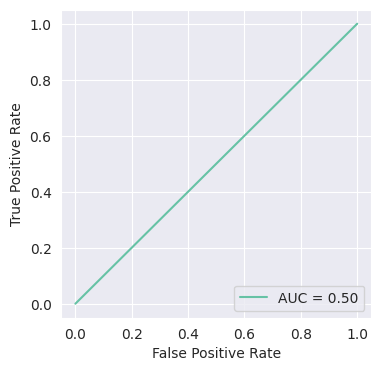

In [ ]:
# ROC_AUC curve
roc_auc_dtc = roc_auc_score(y_test, dtc_test_pred)

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, dtc_test_pred)

display = RocCurveDisplay(fpr = false_positive_rate, tpr = true_positive_rate, roc_auc = roc_auc_dtc).plot()
display.figure_.set_size_inches(4,4)

## Random Forest Classifier

In [ ]:
# importing RandomForestClassifier model

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [ ]:
# using GridSearch algorithm to find the best fit parameters for the model

from sklearn.model_selection import GridSearchCV

parameter_grid = {'n_estimators':[20,40,60,80,100],
                  'criterion':['gini','entropy','log_loss'],
                  'max_depth' : [2,3,4,5,6,7,8]}

grid = GridSearchCV(rfc, parameter_grid, refit = True)

grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 60, 80, 100]})

In [ ]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 40}


In [ ]:
# training the model with best fit parameters

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 8, n_estimators = 40)

rfc.fit(X_train, y_train)

# predicting the train data
rfc_train_pred = rfc.predict(X_train)

In [ ]:
# predicting the test data
rfc_test_pred = rfc.predict(X_test)

In [ ]:
# evaluating the classification metrics
print('Classification metrics of training data:')

# Confusion matrix
c_matrix_rfc = confusion_matrix(y_train, rfc_train_pred)
print('Confusion matrix :')
print(c_matrix_rfc)

# Accuracy
acc_rfc_train = round(accuracy_score(y_train, rfc_train_pred),4)
print('Accuracy : ',acc_rfc_train)

# Precision
prec_rfc_train = round(precision_score(y_train, rfc_train_pred, average = 'weighted', zero_division = 1.0),4)
print('Precision : ',prec_rfc_train)

# Recall score
recall_rfc_train = round(recall_score(y_train, rfc_train_pred, average = 'weighted', zero_division = 1.0),4)
print('Recall : ',recall_rfc_train)

# F1 score
f1_rfc_train = round(f1_score(y_train, rfc_train_pred, average = 'weighted', zero_division = 1.0),4)
print('F1 Score : ',f1_rfc_train)

Classification metrics of training data:
Confusion matrix :
[[1094    0]
 [  97   41]]
Accuracy :  0.9213
Precision :  0.9277
Recall :  0.9213
F1 Score :  0.9016


In [ ]:
print('Classification metrics of test data:')

# Accuracy
acc_rfc_test = round(accuracy_score(y_test, rfc_test_pred),4)
print('Accuracy : ',acc_rfc_test)

# Precision
prec_rfc_test = round(precision_score(y_test, rfc_test_pred, average = 'weighted', zero_division = 1.0),4)
print('Precision : ',prec_rfc_test)

# Recall score
recall_rfc_test = round(recall_score(y_test, rfc_test_pred, average = 'weighted', zero_division = 1.0),4)
print('Recall : ',recall_rfc_test)

# F1 score
f1_rfc_test = round(f1_score(y_test, rfc_test_pred, average = 'weighted', zero_division = 1.0),4)
print('F1 Score : ',f1_rfc_test)

Classification metrics of test data:
Accuracy :  0.8835
Precision :  0.8024
Recall :  0.8835
F1 Score :  0.841


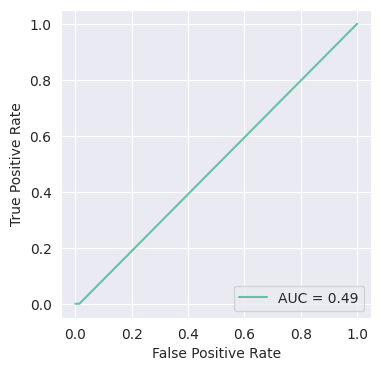

In [ ]:
# ROC_AUC curve
roc_auc_rfc = roc_auc_score(y_test, rfc_test_pred)

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, rfc_test_pred)

display = RocCurveDisplay(fpr = false_positive_rate, tpr = true_positive_rate, roc_auc = roc_auc_rfc).plot()
display.figure_.set_size_inches(4,4)

## XGBoost Classifier

In [ ]:
# importing XGBoost classifier model

from xgboost import XGBClassifier

xgb = XGBClassifier()

In [ ]:
# using GridSearch algorithm to find the best fit parameters for the model

from sklearn.model_selection import GridSearchCV

parameter_grid = {'max_depth' : [2,3,4,5,6,7,8],
                  'n_estimators' : [20,40,60,80,100],
                  'learning_rate' : [0.3,0.5,0.7,0.9]}

grid = GridSearchCV(xgb, parameter_grid, refit = True)

grid.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 0.9],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 60, 80, 100]})

In [ ]:
print(grid.best_params_)

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 60}


In [ ]:
# training the model with best fit parameters

xgb = XGBClassifier(learning_rate = 0.5, max_depth = 5, n_estimators = 60)

xgb.fit(X_train, y_train)

# predicting the trian data
xgb_train_pred = xgb.predict(X_train)

In [ ]:
# predicting the test data
xgb_test_pred = xgb.predict(X_test)

In [ ]:
# evaluating the classification metrics
print('Classification metrics of training data:')

# Confusion matrix
c_matrix_xgb = confusion_matrix(y_train, xgb_train_pred)
print('Confusion matrix :')
print(c_matrix_xgb)

# Accuracy
acc_xgb_train = round(accuracy_score(y_train, xgb_train_pred),4)
print('Accuracy : ',acc_xgb_train)

# Precision
prec_xgb_train = round(precision_score(y_train, xgb_train_pred, average = 'weighted', zero_division = 1.0),4)
print('Precision : ',prec_xgb_train)

# Recall score
recall_xgb_train = round(recall_score(y_train, xgb_train_pred, average = 'weighted', zero_division = 1.0),4)
print('Recall : ',recall_xgb_train)

# F1 score
f1_xgb_train = round(f1_score(y_train, xgb_train_pred, average = 'weighted', zero_division = 1.0),4)
print('F1 Score : ',f1_xgb_train)

Classification metrics of training data:
Confusion matrix :
[[1089    5]
 [  32  106]]
Accuracy :  0.97
Precision :  0.9696
Recall :  0.97
F1 Score :  0.9685


In [ ]:
print('Classification metrics of test data:')

# Accuracy
acc_xgb_test = round(accuracy_score(y_test, xgb_test_pred),4)
print('Accuracy : ',acc_xgb_test)

# Precision
prec_xgb_test = round(precision_score(y_test, xgb_test_pred, average = 'weighted', zero_division = 1.0),4)
print('Precision : ',prec_xgb_test)

# Recall score
recall_xgb_test = round(recall_score(y_test, xgb_test_pred, average = 'weighted', zero_division = 1.0),4)
print('Recall : ',recall_xgb_test)

# F1 score
f1_xgb_test = round(f1_score(y_test, xgb_test_pred, average = 'weighted', zero_division = 1.0),4)
print('F1 Score : ',f1_xgb_test)

Classification metrics of test data:
Accuracy :  0.8803
Precision :  0.8612
Recall :  0.8803
F1 Score :  0.869


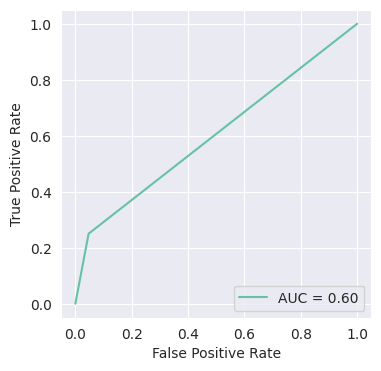

In [ ]:
# ROC_AUC curve
roc_auc_xgb = roc_auc_score(y_test, xgb_test_pred)

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, xgb_test_pred)

display = RocCurveDisplay(fpr = false_positive_rate, tpr = true_positive_rate, roc_auc = roc_auc_xgb).plot()
display.figure_.set_size_inches(4,4)

# **Conclusion**

In [ ]:
# getting all the classification metrics into a pandas dataframe for comparison

data = {'Accuracy of train data':[acc_log_train, acc_dtc_train, acc_rfc_train, acc_xgb_train],
        'Accuracy of test data':[acc_log_test, acc_dtc_test, acc_rfc_test, acc_xgb_test],
        'Precision of train data':[prec_log_train, prec_dtc_train, prec_rfc_train, prec_xgb_train],
        'Precision of test data':[prec_log_test, prec_dtc_test, prec_rfc_test, prec_xgb_test],
        'Recall score of train data':[recall_log_train, recall_dtc_train, recall_rfc_train, recall_xgb_train],
        'Recall score of test data':[recall_log_test, recall_dtc_test, recall_rfc_test, recall_xgb_test],
        'F1 score of train data':[f1_log_train, f1_dtc_train, f1_rfc_train, f1_xgb_train],
        'F1 score of test data':[f1_log_test, f1_dtc_test, f1_rfc_test, f1_xgb_test],
        'ROC_AUC value':[roc_auc_log, roc_auc_dtc, roc_auc_rfc, roc_auc_xgb]
        }

model = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'XGBoost Classifier']

Result = pd.DataFrame(data, index = model)

In [ ]:
Result

,Accuracy of train data,Accuracy of test data,Precision of train data,Precision of test data,Recall score of train data,Recall score of test data,F1 score of train data,F1 score of test data,ROC_AUC value
Logistic Regression,0.8872,0.8964,0.7884,0.9072,0.8872,0.8964,0.8349,0.8475,0.500000
Decision Tree Classifier,0.8880,0.8964,0.9005,0.9072,0.8880,0.8964,0.8353,0.8475,0.500000
Random Forest Classifier,0.9229,0.8835,0.9272,0.8024,0.9229,0.8835,0.9049,0.8410,0.492780
XGBoost Classifier,0.9667,0.8835,0.9668,0.8704,0.9667,0.8835,0.9646,0.8760,0.630979



* From the above data, we can see that all the 4 models worked well and we get good accuracy and all other metrics.
* On comparing the metrics, XGBoost classifier shows high accuracy and precision.
* One important factor to find the best fit model is ROC (Reciever Operating Charateristic). A model with ROC value equal to 1 is the best fit model.
* Here, out of four models, ROC value is maximum for XGBoost classifier which is 0.63.
* Hence, I conclude that **XGBoost Classifier** with **ROC value 0.63** is the best fit model for predicting the data.

# **SQL Queries**

In [ ]:
# splitting the cleaned dataset into 2 dataframes

Credit_card = cleaned_df.iloc[:,:-1]         # Credit_card has all the independent features
label = cleaned_df.iloc[:,[0,-1]]            # label has the ID and the target variable

In [ ]:
# importing the sqlite3 module

import sqlite3

In [ ]:
# establishing connection with sqlite with 'project' database using connect() object

connection = sqlite3.connect('project.db')

In [ ]:
# providing names to the tables

table1 = 'Credit_card'
table2 = 'label'

# copying the dataframes to sql tables through to_sql() object of sqlite module

Credit_card.to_sql(table1, connection, if_exists = 'replace', index = False)
label.to_sql(table2, connection, if_exists = 'replace', index = False)

connection.commit()      # executes the provided changes

####  1. Group the customers based on their income type and find the average of their annual income.

In [ ]:
query1 = pd.read_sql("SELECT Type_income, round(avg(Annual_income),2) as 'Average income' from Credit_card group by Type_Income;",
                     connection)

query1

,Type_Income,Average income
0,Commercial associate,233663.66
1,Pensioner,155084.60
2,State servant,210130.43
3,Working,180366.84


#### 2. Find the female owners of cars and property.

In [ ]:
query2 = pd.read_sql("select Ind_ID, Car_Owner, Propert_Owner from Credit_card where GENDER like 'F' and Car_Owner like 'Y' and Propert_Owner like 'Y';", connection)

query2

,Ind_ID,Car_Owner,Propert_Owner
0,5018498,Y,Y
1,5018501,Y,Y
2,5018503,Y,Y
3,5024213,Y,Y
4,5036660,Y,Y
...,...,...,...
172,5048458,Y,Y
173,5023719,Y,Y
174,5033520,Y,Y
175,5024049,Y,Y


 * **177 female customers have cars and property**

#### 3. Find the male customers who are staying with their families.

In [ ]:
query3 = pd.read_sql("SELECT Ind_ID, GENDER, Housing_type FROM Credit_card WHERE GENDER like 'M' and Housing_type like 'With parents';", connection)

query3

,Ind_ID,GENDER,Housing_type
0,5021303,M,With parents
1,5079166,M,With parents
2,5079167,M,With parents
3,5079168,M,With parents
4,5050729,M,With parents
5,5028383,M,With parents
6,5143019,M,With parents
7,5067982,M,With parents
8,5143573,M,With parents
9,5038751,M,With parents


* **37 male customers are staying with their families**

#### 4. Please list the top five people having the highest income.

In [ ]:
query4 = pd.read_sql("select Ind_ID, Annual_income from Credit_card order by Annual_income desc limit 5;", connection)
query4

,Ind_ID,Annual_income
0,5143231,1575000.0
1,5143235,1575000.0
2,5090470,900000.0
3,5079016,900000.0
4,5079017,900000.0


#### 5. How many married people are having bad credit?

In [ ]:
query5 = pd.read_sql("select cc.Ind_ID, Marital_status, label from Credit_card cc inner join label l on cc.Ind_ID = l.Ind_ID where cc.Marital_status like 'Married' and l.label = 1;", connection)
query5

,Ind_ID,Marital_status,label
0,5008827,Married,1
1,5009744,Married,1
2,5009746,Married,1
3,5009749,Married,1
4,5009752,Married,1
...,...,...,...
105,5149188,Married,1
106,5149190,Married,1
107,5149828,Married,1
108,5149834,Married,1


* **110 married people are having bad credit**

#### 6. What is the highest education level and what is the total count?

In [ ]:
query6 = pd.read_sql("select count(Ind_ID) as 'Total count' from Credit_card where EDUCATION like 'Higher education';", connection)
query6

,Total count
0,421


#### 7. Between married males and females, who is having more bad credit?

In [ ]:
query7 = pd.read_sql("select gender, count(cc.Ind_ID) as total_count from Credit_card cc inner join label l on cc.Ind_ID = l.Ind_ID where cc.Marital_status like 'Married' and l.label = 1 group by gender;", connection)
query7

,GENDER,total_count
0,F,59
1,M,51


* **Married females have more bad credit than married males**

In [ ]:
connection.close()      # closes the sqlite connection